### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import pickle
import tensorflow as tf
from keras.layers.core.dropout import Dropout
from keras.models import Sequential 
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

Mounted at /content/drive


### Load the cleaned dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/dataset/cleaned_data.xlsx')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(len(df))
display(df.head(10))

458197


,id,txt,txt_cleaned,txt_tokens,txt_tokens_sw_nltk,txt_tokens_sw_all,dialect
0,1.175358e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهاية ينتفض يغير,"['لكن', 'بالنهاية', 'ينتفض', 'يغير']","['بالنهاية', 'ينتفض', 'يغير']","['بالنهاية', 'ينتفض', 'يغير']",IQ
1,1.175416e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون ...,"['يعني', 'هذا', 'محسوب', 'على', 'البشر', 'حيون...","['يعني', 'محسوب', 'البشر', 'حيونه', 'وحشيه', '...","['محسوب', 'البشر', 'حيونه', 'وحشيه', 'وتطلبون'...",IQ
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي,"['مبين', 'من', 'كلامه', 'خليجي']","['مبين', 'كلامه', 'خليجي']","['مبين', 'كلامه', 'خليجي']",IQ
3,1.175471e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه,"['يسلملي', 'مرورك', 'وروحك', 'الحلوه']","['يسلملي', 'مرورك', 'وروحك', 'الحلوه']","['يسلملي', 'مرورك', 'وروحك', 'الحلوه']",IQ
4,1.175497e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد,"['وين', 'هل', 'الغيبه', 'اخ', 'محمد']","['وين', 'الغيبه', 'اخ', 'محمد']","['الغيبه', 'اخ', 'محمد']",IQ
5,1.175668e+18,@Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...,ياخي الإرهابي اذا كان عراقي سعودي فلسطيني وين...,"['ياخي', 'الإرهابي', 'اذا', 'كان', 'عراقي', 'س...","['ياخي', 'الإرهابي', 'اذا', 'عراقي', 'سعودي', ...","['الإرهابي', 'عراقي', 'سعودي', 'فلسطيني', 'الم...",IQ
6,1.175670e+18,@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...,مطلبي يقدم استقالته وفوگاها اعتذار,"['مطلبي', 'يقدم', 'استقالته', 'وفوگاها', 'اعتذ...","['مطلبي', 'يقدم', 'استقالته', 'وفوگاها', 'اعتذ...","['مطلبي', 'يقدم', 'استقالته', 'وفوگاها', 'اعتذ...",IQ
7,1.175672e+18,@KanaanRema @Badi9595 خلص والله لعيونكم انا ما...,خلص واله لعيونكم انا ماعندي شيء معه بالعكس من...,"['خلص', 'واله', 'لعيونكم', 'انا', 'ماعندي', 'ش...","['خلص', 'واله', 'لعيونكم', 'انا', 'ماعندي', 'ش...","['خلص', 'واله', 'لعيونكم', 'انا', 'ماعندي', 'ب...",IQ
8,1.175716e+18,@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...,يمكن سؤال فات الكثير الي يصور شنو موقفه وكأنه...,"['يمكن', 'سؤال', 'فات', 'الكثير', 'الي', 'يصور...","['يمكن', 'سؤال', 'فات', 'الكثير', 'الي', 'يصور...","['سؤال', 'فات', 'الكثير', 'الي', 'يصور', 'موقف...",IQ
9,1.176020e+18,@Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...,اولا اني ردت على رجل جنوبي والي ذكر حجابها ثا...,"['اولا', 'اني', 'ردت', 'على', 'رجل', 'جنوبي', ...","['اولا', 'اني', 'ردت', 'رجل', 'جنوبي', 'والي',...","['اولا', 'اني', 'ردت', 'رجل', 'جنوبي', 'والي',...",IQ


In [ ]:
l_encoder = preprocessing.LabelEncoder()
y = l_encoder.fit_transform(df['dialect'])

### Feature Transformation

#### Bag of Words (BOW)

In [ ]:
count_vect = CountVectorizer(analyzer='word')
bow = count_vect.fit_transform(df['txt_tokens_sw_nltk'])
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, y, shuffle=True, test_size=0.2, random_state=0)

#### Term Frequence Inverse Document Frequency (TFIDF)

In [ ]:
tfidf_vect = tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf = tfidf_vect.fit_transform(df['txt_tokens_sw_nltk'])
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, y, shuffle=True, test_size=0.2, random_state=0)

### Modeling

#### Machine Learning

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [ ]:
def build_clf(model, model_name, X_train, X_test, y_train, y_test, cv ):
    global general_model
    general_model = model.fit(X_train, y_train) # train the model
    # make prediction of X_test and print Classification report
    global y_pred
    y_pred = model.predict(X_test)
    # 2- Applying K_Fold Cross Vaildation
    cv_accuracies = cross_val_score(estimator = model , X= X_train , y = y_train ,cv = cv)
    accuracy_avg = cv_accuracies.mean()# measure the accuracy of the model (bais)
    test_accuracy = accuracy_score(y_test, y_pred)
    # Evaluate the model performance using metrics.accuracy_score to measure the score
    print("cross_validation accuracy :  ", cv_accuracies)
    print("\n average cross validation accuracy :  " , accuracy_avg)
    print("\n testing accuracy :  "  ,test_accuracy,"\n")
    print('\nClassification Report:\n')
    print("----------------------------------------------------------------------------------------------")
    print(classification_report(y_test, y_pred))

    print('\nConfusion Matrix:\n')
    print("----------------------------------------------------------------------------------------------")
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(general_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
    plot_learning_curve(general_model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)
  

##### (1) Multi Nomial Naive Bayes With BOW

cross_validation accuracy :   [0.47528818 0.47595662 0.47369857 0.47607225 0.47539016]

 average cross validation accuracy :   0.4752811545214473

 testing accuracy :   0.4889502460957536 


Classification Report:

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.31      0.39      5280
           1       0.44      0.18      0.25      5276
           2       0.78      0.37      0.51      3258
           3       0.53      0.94      0.68     11406
           4       0.89      0.29      0.44      3041
           5       0.54      0.16      0.25      5639
           6       0.34      0.75      0.46      8419
           7       0.66      0.63      0.65      5459
           8       0.65      0.67      0.66      7444
           9       0.93      0.46      0.61      2345
          10       0.70      0.11      0.18      3739
          11       0.38      0.67      0.

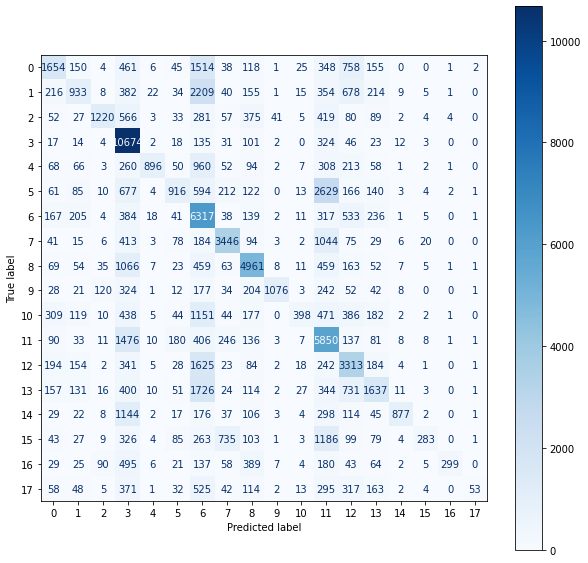

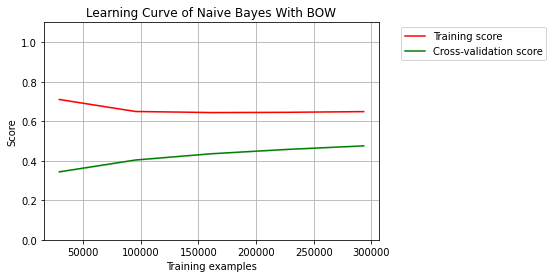

In [ ]:
NB_BOW_model = naive_bayes.MultinomialNB()

build_clf(NB_BOW_model,"Naive Bayes With BOW", X_train_bow, X_test_bow, y_train_bow, y_test_bow ,5)

##### (2) Multi Nomial Naive Bayes With TFIDF

cross_validation accuracy :   [0.38391651 0.3853216  0.38322602 0.38239387 0.38495853]

 average cross validation accuracy :   0.38396330558191993

 testing accuracy :   0.3981076273313617 


Classification Report:

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.14      0.22      5280
           1       0.68      0.07      0.13      5276
           2       0.87      0.17      0.29      3258
           3       0.35      0.97      0.52     11406
           4       0.96      0.09      0.17      3041
           5       0.76      0.07      0.12      5639
           6       0.29      0.79      0.43      8419
           7       0.81      0.43      0.56      5459
           8       0.66      0.57      0.61      7444
           9       0.99      0.20      0.33      2345
          10       0.95      0.03      0.06      3739
          11       0.32      0.66      0

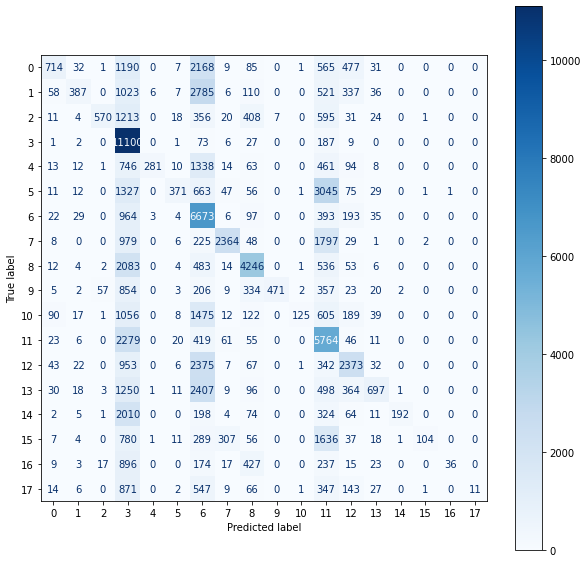

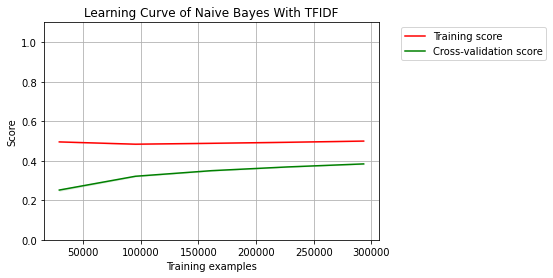

In [ ]:
NB_TFIDF_model = naive_bayes.MultinomialNB()

build_clf(NB_TFIDF_model,"Naive Bayes With TFIDF", X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf ,5)

##### (3) Stochastic Gradient Descent (SGD) (Pipeline)

cross_validation accuracy :   [0.48416888 0.48557397 0.48755866 0.48719033 0.48950944]

 average cross validation accuracy :   0.4868002571678075

 testing accuracy :   0.4910565201733038 


Classification Report:

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.35      0.40      5280
           1       0.39      0.25      0.30      5276
           2       0.57      0.45      0.51      3258
           3       0.51      0.90      0.65     11406
           4       0.54      0.51      0.52      3041
           5       0.44      0.23      0.30      5639
           6       0.47      0.58      0.52      8419
           7       0.53      0.68      0.59      5459
           8       0.56      0.65      0.61      7444
           9       0.59      0.57      0.58      2345
          10       0.40      0.28      0.33      3739
          11       0.47      0.46      0.

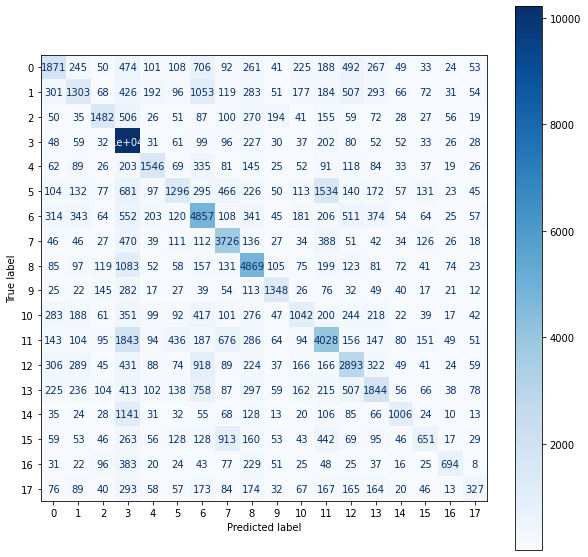

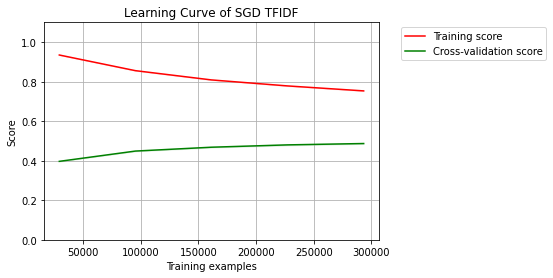

In [ ]:
sgd = Pipeline([('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

build_clf(sgd,"SGD TFIDF", X_train_bow, X_test_bow, y_train_bow, y_test_bow ,5)

#### Deep Learning

##### Prepare the txt data

In [ ]:
MAX_NB_WORDS = 40000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['txt_cleaned'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 493356 unique tokens.


##### save the Tokenizer model

In [ ]:
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### convert txt to Sequence and add Padding

In [ ]:
X = tokenizer.texts_to_sequences(df['txt_cleaned'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (458153, 250)


In [ ]:
y = pd.get_dummies(df['dialect']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (458153, 18)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(366522, 250) (366522, 18)
(91631, 250) (91631, 18)


##### Model Architecture

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, recurrent_dropout=0.2, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          4000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 250, 100)          80400     
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

##### Training

In [ ]:
epochs = 5
batch_size = 128
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, validation_data= (X_test, y_test))

Epoch 1/5
2291/2291 [==============================] - 2728s 1s/step - loss: 2.2757 - accuracy: 0.2699 - val_loss: 1.9063 - val_accuracy: 0.3731
Epoch 2/5
2291/2291 [==============================] - 2731s 1s/step - loss: 1.8042 - accuracy: 0.4128 - val_loss: 1.7505 - val_accuracy: 0.4388
Epoch 3/5
2291/2291 [==============================] - 2859s 1s/step - loss: 1.6296 - accuracy: 0.4781 - val_loss: 1.6886 - val_accuracy: 0.4698
Epoch 4/5
2291/2291 [==============================] - 2698s 1s/step - loss: 1.5019 - accuracy: 0.5221 - val_loss: 1.6778 - val_accuracy: 0.4774
Epoch 5/5
2291/2291 [==============================] - 2692s 1s/step - loss: 1.4081 - accuracy: 0.5536 - val_loss: 1.6706 - val_accuracy: 0.4874


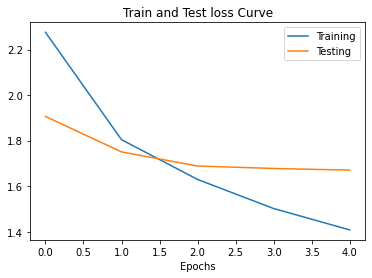

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Testing'])
plt.title('Train and Test loss Curve')
plt.xlabel('Epochs');

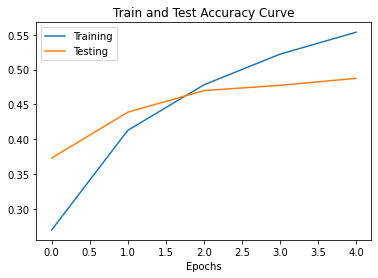

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Testing'])
plt.title('Train and Test Accuracy Curve')
plt.xlabel('Epochs');

In [ ]:
accuracy = model.evaluate(X_test,y_test)
print('Result Metrics\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0], accuracy[1]))

2864/2864 [==============================] - 272s 95ms/step - loss: 1.6702 - accuracy: 0.4878
Result Metrics
  Loss: 1.670
  Accuracy: 0.488


##### Save the model

In [ ]:
model.save("model.h5")